In [15]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems = 2, linewidth = 75)

In [7]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [16]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  6, 10,  0,  3,  2,  8,  7,  5]), tensor([1, 4]))

In [17]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [18]:
import torch.nn as nn

In [19]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-5.6668],
        [-5.7018]], grad_fn=<AddmmBackward0>)

In [20]:
linear_model.weight

Parameter containing:
tensor([[-0.8738]], requires_grad=True)

In [21]:
linear_model.bias

Parameter containing:
tensor([-0.7822], requires_grad=True)

In [22]:
x = torch.ones(1)

In [23]:
linear_model(x)

tensor([-1.6560], grad_fn=<ViewBackward0>)

In [24]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560],
        [-1.6560]], grad_fn=<AddmmBackward0>)

In [26]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr = 1e-2
)

In [27]:
linear_model.parameters()

<generator object Module.parameters at 0x13a272c70>

In [28]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2635]], requires_grad=True),
 Parameter containing:
 tensor([0.1642], requires_grad=True)]

In [29]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"epoch {epoch}, training loss {loss_train.item():.4f},"
                 f"validation loss {loss_val.item():.4f}")

In [33]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [34]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

epoch 1, training loss 165.5040,validation loss 132.2875
epoch 1000, training loss 3.4611,validation loss 2.7266
epoch 2000, training loss 2.9853,validation loss 2.7311
epoch 3000, training loss 2.9778,validation loss 2.7318


In [35]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

epoch 1, training loss 251.0744,validation loss 220.0421
epoch 1000, training loss 3.4806,validation loss 2.7265
epoch 2000, training loss 2.9856,validation loss 2.7311
epoch 3000, training loss 2.9778,validation loss 2.7318


In [36]:
print(linear_model.bias)
print(linear_model.weight)

Parameter containing:
tensor([-17.2732], requires_grad=True)
Parameter containing:
tensor([[5.3757]], requires_grad=True)


In [37]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

In [38]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [39]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [40]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [41]:
from collections import OrderedDict

In [43]:
seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [44]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [45]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.1096], requires_grad=True)

In [47]:
optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model.hidden_linear.weight.grad)

epoch 1, training loss 189.3120,validation loss 153.1107
epoch 1000, training loss 4.7240,validation loss 2.8721
epoch 2000, training loss 3.7921,validation loss 5.2386
epoch 3000, training loss 2.1275,validation loss 2.8677
epoch 4000, training loss 1.7566,validation loss 2.7049
epoch 5000, training loss 1.6325,validation loss 2.7535
output tensor([[11.2284],
        [11.4970]], grad_fn=<AddmmBackward0>)
answer tensor([[14.],
        [11.]])
hidden tensor([[ -0.3875],
        [ -0.4315],
        [-11.6186],
        [  9.8210],
        [  0.2899],
        [-11.2589],
        [  0.2150],
        [-11.0566]])


In [48]:
from matplotlib import pyplot as plt

t_range = torch.arange(20.0, 90.0).unsqueeze(1)

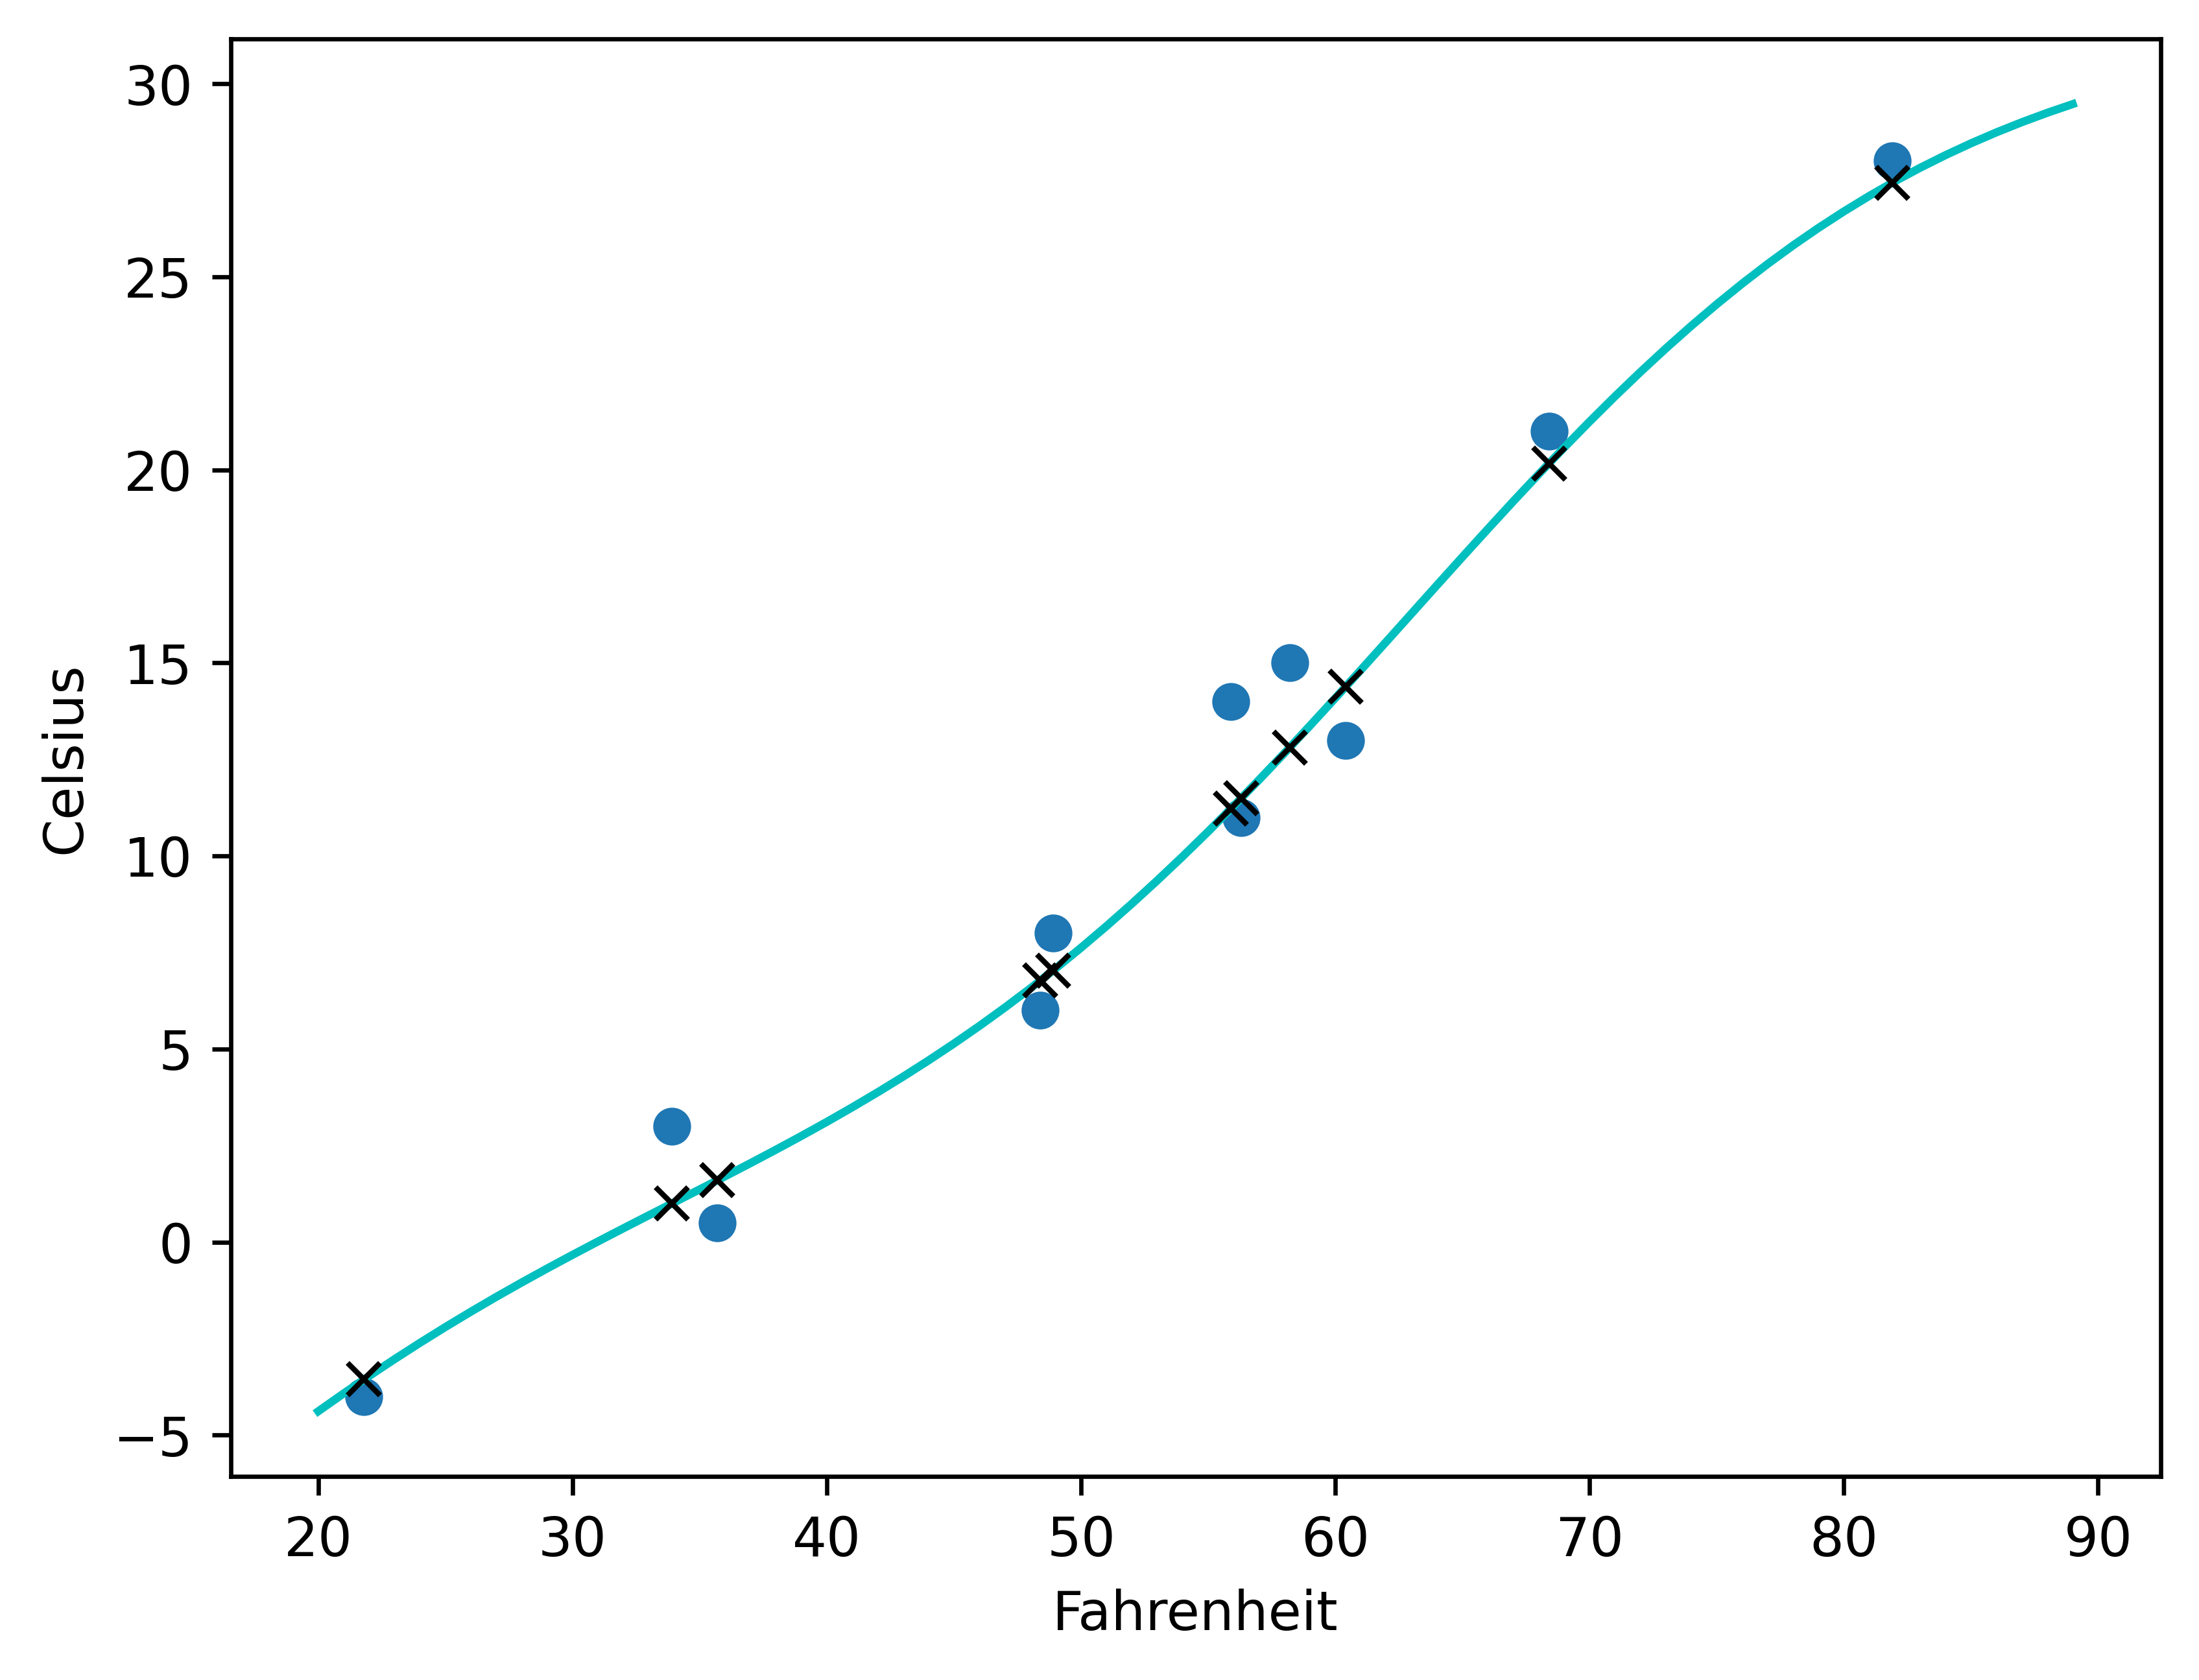

In [50]:
fig = plt.figure(dpi = 600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

In [51]:
from collections import OrderedDict

In [52]:
namedseq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 12)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(12, 1))
]))

In [53]:
namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [54]:
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_linear = nn.Linear(1, 13)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(13, 1)
    
    def forward(self,input):
        hidden_t = self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)
        output_t = self.output_linear(activated_t)
        return output_t

In [55]:
subclass_model = SubclassModel()

In [56]:
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [57]:
for type_str, model in [("seq", seq_model),
                        ("namedseq", namedseq_model),
                        ("subclass", subclass_model)]:
    print(type_str)
    for name_str, param in model.named_parameters():
        print("{:21} {:19} {}".format(
        name_str, str(param.shape), param.numel()))
    print()

seq
hidden_linear.weight  torch.Size([8, 1])  8
hidden_linear.bias    torch.Size([8])     8
output_linear.weight  torch.Size([1, 8])  8
output_linear.bias    torch.Size([1])     1

namedseq
hidden_linear.weight  torch.Size([12, 1]) 12
hidden_linear.bias    torch.Size([12])    12
output_linear.weight  torch.Size([1, 12]) 12
output_linear.bias    torch.Size([1])     1

subclass
hidden_linear.weight  torch.Size([13, 1]) 13
hidden_linear.bias    torch.Size([13])    13
output_linear.weight  torch.Size([1, 13]) 13
output_linear.bias    torch.Size([1])     1

